<a href="https://colab.research.google.com/github/alazoor/mima-hhh/blob/main/Qari_Free_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers qwen_vl_utils accelerate>=0.26.0 PEFT -U

In [2]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 16.2 MB/s eta 0:00:00


In [3]:
from PIL import Image
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
import torch
import os
from qwen_vl_utils import process_vision_info



model_name = "NAMAA-Space/Qari-OCR-0.1-VL-2B-Instruct"
model = Qwen2VLForConditionalGeneration.from_pretrained(
                model_name,
                torch_dtype="auto",
                device_map="auto"
            )
processor = AutoProcessor.from_pretrained(model_name)
max_tokens = 2000

`torch_dtype` is deprecated! Use `dtype` instead!
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/116M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

The image processor of type `Qwen2VLImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. Note that this behavior will be extended to all models in a future release.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

In [6]:
from PIL import Image
import requests
url = "/content/Screenshot_٢٠٢٥١٠٢٢-٠٢٠٩٥٢_WhatsApp.jpg"
image = Image.open(requests.get(url, stream=True).raw)

MissingSchema: Invalid URL '/content/Screenshot_٢٠٢٥١٠٢٢-٠٢٠٩٥٢_WhatsApp.jpg': No scheme supplied. Perhaps you meant https:///content/Screenshot_٢٠٢٥١٠٢٢-٠٢٠٩٥٢_WhatsApp.jpg?

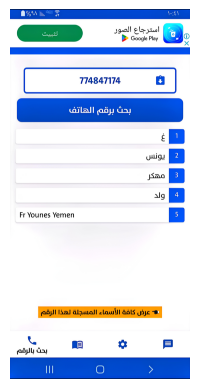

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# إذا الصورة في مجلد /content المحلي
image_path = "/content/Screenshot_٢٠٢٥١٠٢٢-٠٢٠٩٥٢_WhatsApp.jpg"
image = Image.open(image_path)

# عرض الصورة
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:

src="image.png"

prompt = "Below is the image of one page of a document, as well as some raw textual content that was previously extracted for it. Just return the plain text representation of this document as if you were reading it naturally. Do not hallucinate."
image.save(src)

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": f"file://{src}"},
            {"type": "text", "text": prompt},
        ],
    }
]
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")
generated_ids = model.generate(**inputs, max_new_tokens=max_tokens)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]
os.remove(src)
print(output_text)

OutOfMemoryError: CUDA out of memory. Tried to allocate 252.98 GiB. GPU 0 has a total capacity of 14.74 GiB of which 8.22 GiB is free. Process 2518 has 6.52 GiB memory in use. Of the allocated memory 5.57 GiB is allocated by PyTorch, and 843.32 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [9]:
from PIL import Image
import os

# فتح الصورة وتقليل حجمها
image = Image.open("/content/Screenshot_٢٠٢٥١٠٢٢-٠٢٠٩٥٢_WhatsApp.jpg")

# تقليل حجم الصورة (مثال: جعل أقصى عرض 1024 بكسل)
max_size = (1024, 1024)
image.thumbnail(max_size, Image.Resampling.LANCZOS)

# حفظ الصورة المصغرة مؤقتاً
src = "resized_image.png"
image.save(src)

prompt = "Below is the image of one page of a document, as well as some raw textual content that was previously extracted for it. Just return the plain text representation of this document as if you were reading it naturally. Do not hallucinate."

messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": f"file://{src}"},
            {"type": "text", "text": prompt},
        ],
    }
]

text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# تقليل max_tokens أيضاً
max_tokens = 512  # بدلاً من القيمة الكبيرة السابقة

try:
    generated_ids = model.generate(**inputs, max_new_tokens=max_tokens)
    generated_ids_trimmed = [
        out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )[0]
    os.remove(src)
    print(output_text)
except Exception as e:
    os.remove(src)
    print(f"Error: {e}")

استرجاع الصور Google Play
774847174
بحث برقم الهاتف
1
2
3
4
5
Fr Younes Yemen
عرض كافة الأسماء المسجلة لهذا الرقم
بحث بالرقم

